# GeNet walk-through

## Reading in a network

In [1]:
import genet as gn
import pandas as pd
import networkx as nx
import os

In [2]:
path_to_matsim_network = '../example_data/pt2matsim_network'

In [3]:
n = gn.Network('epsg:27700')

In [4]:
n

<Network instance at 4645520528: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 0
Number of edges: 0
 and 
schedule Schedule:
Number of services: 0
Number of unique routes: 0
Number of stops: 0

In [5]:
network = os.path.join(path_to_matsim_network, 'network.xml')
schedule = os.path.join(path_to_matsim_network, 'schedule.xml')

In [6]:
n.read_matsim_network(network)

In [7]:
n.read_matsim_schedule(schedule)

In [8]:
n

<Network instance at 4645520528: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 1662
Number of edges: 3166
Average in degree:   1.9049
Average out degree:   1.9049 and 
schedule Schedule:
Number of services: 62
Number of unique routes: 520
Number of stops: 118

In [9]:
list(n.nodes())[0]

('101982',
 {'id': '101982',
  'x': 528704.1425925883,
  'y': 182068.78193707118,
  'lon': -0.14625948709424305,
  'lat': 51.52287873323954,
  's2_id': 5221390329378179879})

In [10]:
list(n.links())[0]

('1',
 {'id': '1',
  'from': '25508485',
  'to': '21667818',
  'freespeed': 4.166666666666667,
  'capacity': 600.0,
  'permlanes': 1.0,
  'oneway': '1',
  'modes': ['car'],
  's2_from': 5221390301001263407,
  's2_to': 5221390302696205321,
  'length': 52.765151087870265,
  'attributes': {'osm:way:access': {'name': 'osm:way:access',
    'class': 'java.lang.String',
    'text': 'permissive'},
   'osm:way:highway': {'name': 'osm:way:highway',
    'class': 'java.lang.String',
    'text': 'unclassified'},
   'osm:way:id': {'name': 'osm:way:id',
    'class': 'java.lang.Long',
    'text': '26997928'},
   'osm:way:name': {'name': 'osm:way:name',
    'class': 'java.lang.String',
    'text': 'Brunswick Place'}}})

By default, `plot` function will plot the network with the schedule routed on the network (if the services in the schedule have network routes)

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


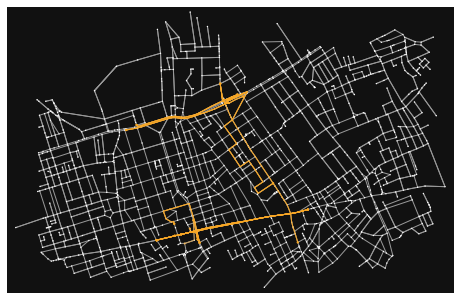

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1169d2710>)

In [11]:
n.plot()

You can also specifically request a plot of the network graph using `plot_graph`

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


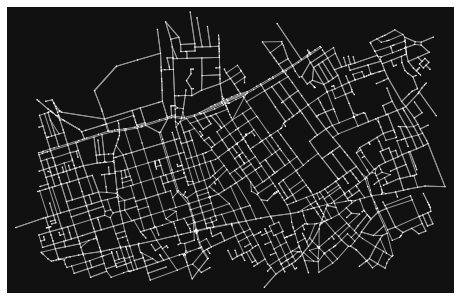

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116751750>)

In [12]:
n.plot_graph()

Or a plot of the unsnapped schedule, showing connections between stops only with the network graph underneath, using `plot_schedule`

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


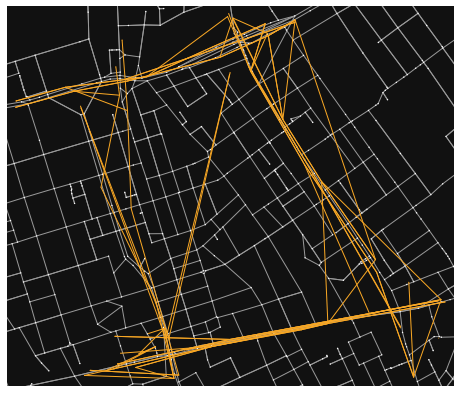

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1165e3810>)

In [13]:
n.plot_schedule()

## Reading in other data sources

### OSM
You can read in Open Street Map (OSM) data to create a Network graph.

In [14]:
_n_tiny = gn.Network('epsg:27700')

In [15]:
_n_tiny.read_osm('../example_data/tiny_example.osm', '../configs/default_config.yml')

2020-07-28 19:33:03,904 - Building OSM graph from file ../example_data/tiny_example.osm
2020-07-28 19:33:03,978 - Creating networkx graph from OSM data
2020-07-28 19:33:03,979 - OSM: Extract Nodes and Paths from OSM data
2020-07-28 19:33:04,004 - OSM: Add each OSM way (aka, path) to the OSM graph
2020-07-28 19:33:04,020 - OSM: add length (great circle distance between nodes) attribute to each edge and index by s2
2020-07-28 19:33:04,049 - Created OSM edges
2020-07-28 19:33:07,340 - Deleting isolated nodes which have no edges.


In [16]:
_n_tiny

<Network instance at 4670839888: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 176
Number of edges: 275
Average in degree:   1.5625
Average out degree:   1.5625 and 
schedule Schedule:
Number of services: 0
Number of unique routes: 0
Number of stops: 0

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


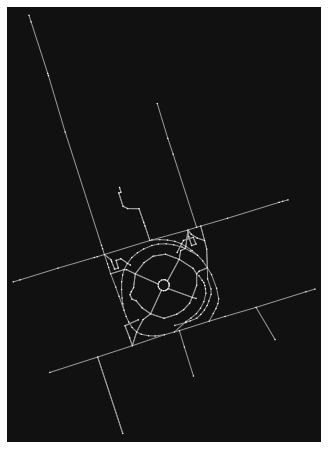

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116640950>)

In [17]:
_n_tiny.plot()

In [18]:
_n = gn.Network('epsg:27700')

In [19]:
_n.read_osm('../example_data/example.osm', '../configs/slim_config.yml')

2020-07-28 19:33:10,133 - Building OSM graph from file ../example_data/example.osm
2020-07-28 19:33:10,638 - Creating networkx graph from OSM data
2020-07-28 19:33:10,639 - OSM: Extract Nodes and Paths from OSM data
2020-07-28 19:33:10,859 - OSM: Add each OSM way (aka, path) to the OSM graph
2020-07-28 19:33:10,860 - 1 or 2 batches of size 100 ish
2020-07-28 19:33:10,876 - OSM: add length (great circle distance between nodes) attribute to each edge and index by s2
2020-07-28 19:33:10,949 - Created OSM edges
2020-07-28 19:33:43,214 - Deleting isolated nodes which have no edges.


/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


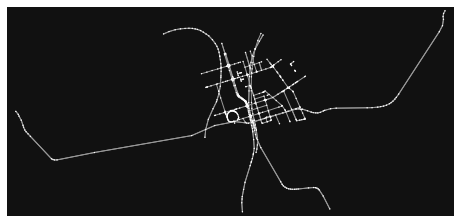

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1153a26d0>)

In [20]:
_n.plot()

In [21]:
_n

<Network instance at 4649325200: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 563
Number of edges: 802
Average in degree:   1.4245
Average out degree:   1.4245 and 
schedule Schedule:
Number of services: 0
Number of unique routes: 0
Number of stops: 0

### Adding two networks

You can add one network to another. The network you're adding the other network too will be updated with the nodes, link and data from the other network. The process aims to consolidate node and link indexing, for nodes in the same spot and links with the same modes.

For now, the method only supports non overlapping services so let's merge two graphs, one of which being a small subgraph of `n`.

In [22]:
_n.add(_n_tiny)

2020-07-28 19:34:17,140 - Generated node id 7195968685.
2020-07-28 19:34:17,148 - Changed Link attributes under index: 261
2020-07-28 19:34:17,153 - Changed Link attributes under index: 275
2020-07-28 19:34:17,162 - Changed Link attributes under index: 260
2020-07-28 19:34:17,174 - Changed Link attributes under index: 274
2020-07-28 19:34:17,200 - Changed Node attributes under index: 1684410096
2020-07-28 19:34:17,208 - Changed Node index from 1684410096 to 7195968685
2020-07-28 19:34:17,211 - Generated node id 7195968686.
2020-07-28 19:34:17,218 - Changed Link attributes under index: 265
2020-07-28 19:34:17,236 - Changed Node attributes under index: 101998
2020-07-28 19:34:17,250 - Changed Node index from 101998 to 7195968686
/Users/kasia.kozlowska/PycharmProjects/ABM/genet/genet/utils/graph_operations.py:247: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for idx in s2_id_df.dropna()[s2_id_df['right'] != s2_id_df['left']].index]
2020-07-28 19:34:17,264 

2020-07-28 19:34:25,008 - Changed Link index from 163 to 843
2020-07-28 19:34:25,010 - Generated link id 844.
2020-07-28 19:34:25,025 - Changed Link attributes under index: 67
2020-07-28 19:34:25,028 - Changed Link index from 67 to 844
2020-07-28 19:34:25,030 - Generated link id 845.
2020-07-28 19:34:25,047 - Changed Link attributes under index: 42
2020-07-28 19:34:25,050 - Changed Link index from 42 to 845
2020-07-28 19:34:25,053 - Generated link id 846.
2020-07-28 19:34:25,063 - Changed Link attributes under index: 178
2020-07-28 19:34:25,063 - Changed Link index from 178 to 846
2020-07-28 19:34:25,065 - Generated link id 847.
2020-07-28 19:34:25,081 - Changed Link attributes under index: 28
2020-07-28 19:34:25,081 - Changed Link index from 28 to 847
2020-07-28 19:34:25,084 - Generated link id 848.
2020-07-28 19:34:25,095 - Changed Link attributes under index: 168
2020-07-28 19:34:25,097 - Changed Link index from 168 to 848
2020-07-28 19:34:25,099 - Generated link id 849.
2020-07-28 

2020-07-28 19:34:26,061 - Changed Link attributes under index: 211
2020-07-28 19:34:26,065 - Changed Link index from 211 to 890
2020-07-28 19:34:26,068 - Generated link id 891.
2020-07-28 19:34:26,092 - Changed Link attributes under index: 150
2020-07-28 19:34:26,093 - Changed Link index from 150 to 891
2020-07-28 19:34:26,094 - Generated link id 892.
2020-07-28 19:34:26,114 - Changed Link attributes under index: 51
2020-07-28 19:34:26,115 - Changed Link index from 51 to 892
2020-07-28 19:34:26,118 - Generated link id 893.
2020-07-28 19:34:26,138 - Changed Link attributes under index: 209
2020-07-28 19:34:26,139 - Changed Link index from 209 to 893
2020-07-28 19:34:26,141 - Generated link id 894.
2020-07-28 19:34:26,153 - Changed Link attributes under index: 123
2020-07-28 19:34:26,154 - Changed Link index from 123 to 894
2020-07-28 19:34:26,157 - Generated link id 895.
2020-07-28 19:34:26,175 - Changed Link attributes under index: 179
2020-07-28 19:34:26,176 - Changed Link index from 

2020-07-28 19:34:27,009 - Generated link id 937.
2020-07-28 19:34:27,025 - Changed Link attributes under index: 64
2020-07-28 19:34:27,027 - Changed Link index from 64 to 937
2020-07-28 19:34:27,030 - Generated link id 938.
2020-07-28 19:34:27,047 - Changed Link attributes under index: 112
2020-07-28 19:34:27,050 - Changed Link index from 112 to 938
2020-07-28 19:34:27,053 - Generated link id 939.
2020-07-28 19:34:27,072 - Changed Link attributes under index: 52
2020-07-28 19:34:27,073 - Changed Link index from 52 to 939
2020-07-28 19:34:27,074 - Generated link id 940.
2020-07-28 19:34:27,099 - Changed Link attributes under index: 106
2020-07-28 19:34:27,099 - Changed Link index from 106 to 940
2020-07-28 19:34:27,102 - Generated link id 941.
2020-07-28 19:34:27,137 - Changed Link attributes under index: 149
2020-07-28 19:34:27,138 - Changed Link index from 149 to 941
2020-07-28 19:34:27,141 - Generated link id 942.
2020-07-28 19:34:27,152 - Changed Link attributes under index: 24
2020

2020-07-28 19:34:27,884 - Changed Link index from 220 to 983
2020-07-28 19:34:27,887 - Generated link id 984.
2020-07-28 19:34:27,899 - Changed Link attributes under index: 217
2020-07-28 19:34:27,899 - Changed Link index from 217 to 984
2020-07-28 19:34:27,903 - Generated link id 985.
2020-07-28 19:34:27,914 - Changed Link attributes under index: 117
2020-07-28 19:34:27,915 - Changed Link index from 117 to 985
2020-07-28 19:34:27,918 - Generated link id 986.
2020-07-28 19:34:27,933 - Changed Link attributes under index: 129
2020-07-28 19:34:27,934 - Changed Link index from 129 to 986
2020-07-28 19:34:27,936 - Generated link id 987.
2020-07-28 19:34:27,958 - Changed Link attributes under index: 111
2020-07-28 19:34:27,961 - Changed Link index from 111 to 987
2020-07-28 19:34:27,963 - Generated link id 988.
2020-07-28 19:34:27,972 - Changed Link attributes under index: 171
2020-07-28 19:34:27,980 - Changed Link index from 171 to 988
2020-07-28 19:34:27,981 - Generated link id 989.
2020-

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


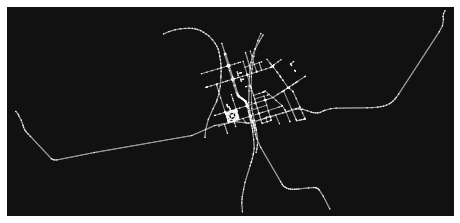

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a4ae5d0>)

In [23]:
_n.plot()

In [24]:
_n

<Network instance at 4649325200: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 665
Number of edges: 1003
Average in degree:   1.5083
Average out degree:   1.5083 and 
schedule Schedule:
Number of services: 0
Number of unique routes: 0
Number of stops: 0

#### Remark:
A graph generated from OSM is most likely not **strongly connected** which is something that MATSim expects for the mode `car` and if using `multimodal.contrib` also for modes `walk` and `bike`.

### GTFS

In [25]:
_s = gn.Schedule('epsg:27700')

In [26]:
_s.read_gtfs_schedule('../example_data/example_gtfs', '20190603')

2020-07-28 19:34:29,482 - Reading the calendar for GTFS
2020-07-28 19:34:29,485 - Reading GTFS data into usable format
2020-07-28 19:34:29,487 - Reading stop times
2020-07-28 19:34:29,489 - Reading trips
2020-07-28 19:34:29,491 - Reading stops
2020-07-28 19:34:29,494 - Reading routes


In [27]:
_s

<Schedule instance at 4736297040: with 2 services>

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


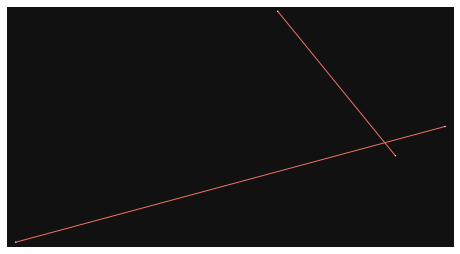

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ac34ad0>)

In [28]:
_s.plot()

## Using the `Network` object

### Summary

The data saved on the edges or nodes of the graph can be nested. There are a couple of convenient methods that summarise the schema of the data found on the nodes and links. If `data=True`, the output also shows up to 5 unique values stored in that location.

In [29]:
n.node_attribute_summary(data=True)

attribute
├── id: ['107345', '9790785', '6762589354', '293810496', '323258115']
├── x: [528387.4250512555, 528391.4406755936, 528393.2742107178, 528396.6287644263, 528396.3513181042]
├── y: [181547.5850354673, 181552.72935927223, 181558.10532352765, 181559.970402835, 181562.0370527053]
├── lon: [-0.15178558709839862, -0.15872448710537235, -0.13569068709168342, -0.13766218709633904, -0.13543658708819173]
├── lat: [51.51609983324067, 51.5182034332405, 51.51504733324089, 51.522253033239515, 51.522948433239556]
└── s2_id: [5221390710015643649, 5221390314367946753, 5221366508477440003, 5221390682291777543, 5221390739236081673]


In [30]:
n.link_attribute_summary(data=True)

attribute
├── id: ['1983', '565', '2212', '2420', '2626']
├── from: ['107345', '9790785', '6762589354', '293810496', '323258115']
├── to: ['107345', '9790785', '6762589354', '293810496', '323258115']
├── freespeed: [2.7777777777777777, 4.166666666666667, 5.0, 6.944444444444445, 8.333333333333334]
├── capacity: [4000.0, 8000.0, 12000.0, 1000.0, 1800.0]
├── permlanes: [1.0, 2.0, 3.0, 4.0, 5.0]
├── oneway: ['1']
├── modes: ['pt', 'bus', 'car', 'artificial']
├── s2_from: [5221390710015643649, 5221390314367946753, 5221366508477440003, 5221390682291777543, 5221390739236081673]
├── s2_to: [5221390710015643649, 5221390314367946753, 5221366508477440003, 5221390682291777543, 5221390739236081673]
├── length: [2.6358639819628706, 3.5904978805887175, 4.599609949197294, 4.620218895820138, 5.8016284584454105]
└── attributes
    ├── osm:way:access
    │   ├── name: ['osm:way:access']
    │   ├── class: ['java.lang.String']
    │   └── text: ['destination', 'yes', 'private', 'permissive', 'no']
    ├──

Once you see the general schema for the data stored on nodes and links, you may decide to look at or perform analysis 
on all of the data stored in the netowrk under a particular key. A GeNet network has two methods which generate a
`pandas.Series` object, which stores the nodes or links data present at the specified key, indexed by the same index 
as the nodes or links.

In [31]:
s2_id = n.node_attribute_data_under_key('s2_id')

In [32]:
s2_id

101982       5221390329378179879
101986       5221390328605860387
101990       5221390304444511271
101991       5221390303978897267
101992       5221390304897644929
                    ...         
983839058    5221390693831817171
99936        5221390297975475113
99937        5221390299484831045
99940        5221390294354743413
99943        5221390298004852605
Length: 1662, dtype: int64

In [33]:
n.link_attribute_data_under_key('freespeed').head()

1       4.166667
10      4.166667
100     4.166667
1000    4.166667
1001    4.166667
dtype: float64

Or you can access nested data,

In [34]:
n.link_attribute_data_under_key({'attributes': {'osm:way:lanes': 'text'}}).head()

1007    2
1008    2
1037    2
1038    2
1039    2
dtype: object

You can also build a `pandas.DataFrame` out of several keys.

In [35]:
n.link_attribute_data_under_keys(['freespeed', {'attributes': {'osm:way:highway': 'text'}}]).head()

,freespeed,attributes::osm:way:highway::text
1,4.166667,unclassified
10,4.166667,unclassified
100,4.166667,unclassified
1000,4.166667,residential
1001,4.166667,residential


### Extracting links of interest

The function below gathers link ids which satisfy conditions 
to arbitrary level of nested-ness. It also allows quite flexible conditions---below we require that the link value
at `data['attributes']['osm:way:highway']['text'] == 'primary'`, where data is the data dictionary stored on that link.

In [36]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'attributes': {'osm:way:highway': {'text': 'primary'}}},
)

In [37]:
links[:5]

['1007', '1008', '1023', '1024', '103']

In [38]:
len(links)

619

Below we now require that the link value
at `data['attributes']['osm:way:highway']['text'] in ['primary', 'something else']`. There is nothing in the data that has such tags, so the output is the same.

In [39]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'attributes': {'osm:way:highway': {'text': ['primary', 'something else']}}},
)

In [40]:
links[:5]

['1007', '1008', '1023', '1024', '103']

In [41]:
len(links)

619

We can also pass a list of conditions. In this case it makes sense for us to specify how multiple conditions should be handled. We can do it via 
- `how=all` - all conditions need to be met
- `how=any` - at least one condition needs to be met

It is set to `any` as default.

In [42]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= [{'attributes': {'osm:way:highway': {'text': 'primary'}}},
                 {'attributes': {'osm:way:highway': {'text': 'something else'}}}],
    how=any
)

In [43]:
links[:5]

['1007', '1008', '1023', '1024', '103']

In [44]:
len(links)

619

In [45]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= [{'attributes': {'osm:way:highway': {'text': 'primary'}}},
                 {'attributes': {'osm:way:highway': {'text': 'something else'}}}],
    how=all
)

In [46]:
links[:5]

[]

As expected, no links satisfy both `data['attributes']['osm:way:highway']['text'] == 'primary'` and `data['attributes']['osm:way:highway']['text'] == 'something else'`.

Below, we give an example of subsetting a numeric boundary. We find links where `0 <= 'freespeed'  <= 20`.

In [47]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions = {'freespeed': (0,20)},
)

In [48]:
links[:5]

['1', '10', '100', '1000', '1001']

In [49]:
len(links)

2334

Finally, we can define a function that will handle the condition for us. The function should take the value expected at the key in the data dictionary and return either `True` or `False`.

For example, below we give an example equivalent to our first example of `data['attributes']['osm:way:highway']['text'] == 'primary'` but using a function we defined ourselves to handle the condition.

In [50]:
def highway_primary(value):
    return value == 'primary'

links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'attributes': {'osm:way:highway': {'text': highway_primary}}},
)

In [51]:
links[:5]

['1007', '1008', '1023', '1024', '103']

In [52]:
len(links)

619

This allows for really flexible subsetting of the network based on data stored on the edges. Another example, similar to the numeric boundary, but this time we only care about the upper bound and we make it a strict inequality.

In [53]:
def below_20(value):
    return value < 20

links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'freespeed': below_20},
)

In [54]:
links[:5]

['1', '10', '100', '1000', '1001']

In [55]:
len(links)

2334

## Using the `Schedule` object

In [56]:
n.schedule.print()

Schedule:
Number of services: 62
Number of unique routes: 520
Number of stops: 118


You can plot the `Schedule` object. It will result in plotting the ocnnections between stops for all `Route`s within all `Service`s. To plot the network routes of the `Schedule` you need information about the `Network`, this can be done using the `plot` function for the `Network` object.

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


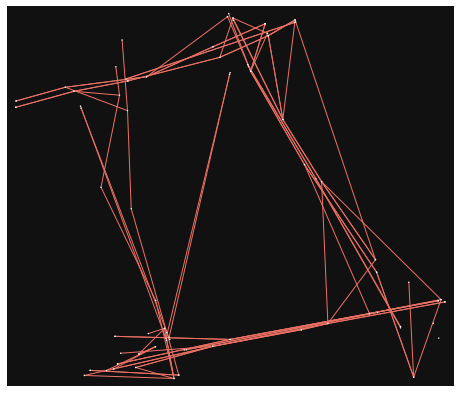

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b6850d0>)

In [57]:
n.schedule.plot()

In [58]:
n.schedule.service_ids()[:5]

['10314', '12430', '14073', '14134', '15003']

In [59]:
service = n.schedule['12430']
service.print()

Service ID: 12430
Name: 205
Number of routes: 12
Number of unique stops: 11


/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


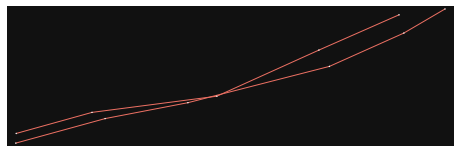

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b791fd0>)

In [60]:
service.plot()

In [61]:
route = service.routes[0]
route.print()

Route ID: VJ948e8caa0f08b9c6bf6330927893942c474b5100
Name: 205
Number of stops: 5
Number of trips: 10


/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


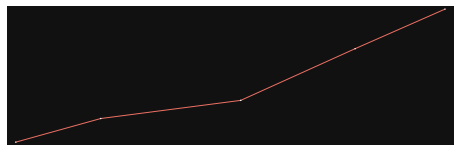

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b6ad8d0>)

In [62]:
route.plot()

In [63]:
stop = route.stops[0]
stop.print()

Stop ID: 490007807E.link:1154
Projection: epsg:27700
Lat, Lon: 51.52336503, -0.14951799
linkRefId: 1154


In [64]:
for service_id, route in n.schedule.routes():
    print(route.id)
    print(route.arrival_offsets)
    print(route.departure_offsets)

VJbd8660f05fe6f744e58a66ae12bd66acbca88b98
[]
[]
VJc1917d79cd0c4f5f42519e362770d125c9f209c6
['00:00:00', '00:01:40']
['00:00:00', '00:01:40']
VJ042669cc08161b30efa3b508346b648613a95047
['00:00:00', '00:02:20']
['00:00:00', '00:02:20']
VJ77530340dfe6e2a540002a6c7c283879d708dec6
['00:00:00', '00:01:00']
['00:00:00', '00:01:00']
VJfd74b67b9801ab3010f64fd130ec9ef9062470d3
['00:00:00', '00:02:00']
['00:00:00', '00:02:00']
VJ37e93a6ebc1f8b2be99e4279776413113b7ce4c5
['00:00:00', '00:01:20']
['00:00:00', '00:01:20']
VJ948e8caa0f08b9c6bf6330927893942c474b5100
['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00']
['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00']
VJ06cd41dcd58d947097df4a8f33234ef423210154
['00:00:00', '00:01:26', '00:02:52', '00:04:17', '00:05:43', '00:07:09']
['00:00:00', '00:01:26', '00:02:52', '00:04:17', '00:05:43', '00:07:09']
VJeae6e634f8479e0b6712780d5728f0afca964e64
['00:00:00', '00:01:09', '00:02:17', '00:03:26', '00:04:34', '00:05:43']
['00:00:00', '00

['00:00:00', '00:04:00', '00:04:44']
VJ9b58a59e3d74941586a5bca7726a8aa624da67fc
['00:00:00', '00:01:00']
['00:00:00', '00:01:00']
VJ8ccf92aa0f351b2e31f1a078b968dff4c2505c02
['00:00:00', '00:07:00', '00:08:06']
['00:00:00', '00:07:00', '00:08:06']
VJ3d50b96792ae8495dbe5a5e372849a60c48b2279
['00:00:00', '00:03:00', '00:03:44']
['00:00:00', '00:03:00', '00:03:44']
VJ1a8cc306354fdc322d739ae644eb73444341d08d
['00:00:00', '00:04:00', '00:04:55']
['00:00:00', '00:04:00', '00:04:55']
VJbf9d4fdb976223e6a026c0c669ed290418abefee
['00:00:00', '00:05:00', '00:05:44']
['00:00:00', '00:05:00', '00:05:44']
VJ652c769bc42361cc0308dff59a1fdcf0949bdade
['00:00:00', '00:04:00', '00:05:06']
['00:00:00', '00:04:00', '00:05:06']
VJd4cbfb092a104ac6a3164a86e9765f68734fdfcf
['00:00:00', '00:06:00', '00:07:06']
['00:00:00', '00:06:00', '00:07:06']
VJ28a8a6a4ab02807a4fdfd199e5c2ca0622d34d0c
['00:00:00', '00:06:00', '00:06:55']
['00:00:00', '00:06:00', '00:06:55']
VJ3716910ec59c370d9f5c69137df7276b68cf0a08
['00:00:

## Modifying the `Network` object

`GeNet` supports some simple modifications like adding, reindexing and removing nodes and links and some involved modifications like changing the data stored under nodes or links (which will be discussed below). All of these changes get recorded in `n.change_log`.

In [65]:
n.add_link(link_id='proposed_index', u='4356572310', v='5811263955')

2020-07-28 19:34:32,742 - Added Link with index proposed_index, from node:4356572310 to node:5811263955, under multi-index:1, and data={'from': '4356572310', 'to': '5811263955', 'id': 'proposed_index'}


'proposed_index'

In [66]:
n.add_node(node='proposed_index', attribs={'data':'some_data'})

2020-07-28 19:34:32,754 - Added Node with index `proposed_index` and data={'data': 'some_data'}


'proposed_index'

The index passed is only a proposition. If a node or link under this link exists, a new, unique index will be generated.

In [67]:
actual_link_id_added = n.add_link(link_id='proposed_index', u='4356572310', v='5811263955')

2020-07-28 19:34:32,763 - Generated link id 676e3ddf-5f60-47d8-9b2e-5d9fab815245.
2020-07-28 19:34:32,765 - This link_id=`proposed_index` already exists. Generated a new unique_index: `676e3ddf-5f60-47d8-9b2e-5d9fab815245`
2020-07-28 19:34:32,771 - Added Link with index 676e3ddf-5f60-47d8-9b2e-5d9fab815245, from node:4356572310 to node:5811263955, under multi-index:2, and data={'from': '4356572310', 'to': '5811263955', 'id': '676e3ddf-5f60-47d8-9b2e-5d9fab815245'}


To reindex a node or link:

In [68]:
n.reindex_node('proposed_index', 'another_index')

2020-07-28 19:34:32,839 - Changed Node attributes under index: proposed_index
2020-07-28 19:34:32,881 - Changed Node index from proposed_index to another_index


In [69]:
n.reindex_link('proposed_index', 'another_index')

2020-07-28 19:34:32,904 - Changed Link attributes under index: proposed_index
2020-07-28 19:34:32,906 - Changed Link index from proposed_index to another_index


To remove a link or node:

In [70]:
n.remove_links(['another_index', actual_link_id_added])

2020-07-28 19:34:32,916 - Removed Link under index: another_index
2020-07-28 19:34:32,922 - Removed Link under index: 676e3ddf-5f60-47d8-9b2e-5d9fab815245


In [71]:
n.remove_node('another_index')

2020-07-28 19:34:32,931 - Removed Node under index: another_index


Let's say you have extracted `genet.Network` link ids of interest and now you want to make changes to the network. Let's make changes to the nested OSM data stored on the links. We will replace the highway tags from `'primary'` to `'SOMETHING'`.

In [72]:
links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'attributes': {'osm:way:highway': {'text': 'primary'}}},
)

links[:5]

['1007', '1008', '1023', '1024', '103']

In [73]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': ['car'],
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'length': 13.941905154249884,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'primary'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}}}

We create a dictionary which maps same changes to all links in the list using:
    
    {link_id: {'attributes': {'osm:way:highway': {'text': 'SOMETHING'}}} for link_id in links}

In [74]:
n.apply_attributes_to_links({link_id: {'attributes': {'osm:way:highway': {'text': 'SOMETHING'}}} for link_id in links})

2020-07-28 19:34:32,986 - Changed Link attributes under index: 1007
2020-07-28 19:34:32,992 - Changed Link attributes under index: 1008
2020-07-28 19:34:32,997 - Changed Link attributes under index: 1023
2020-07-28 19:34:33,002 - Changed Link attributes under index: 1024
2020-07-28 19:34:33,007 - Changed Link attributes under index: 103
2020-07-28 19:34:33,011 - Changed Link attributes under index: 1035
2020-07-28 19:34:33,016 - Changed Link attributes under index: 1036
2020-07-28 19:34:33,020 - Changed Link attributes under index: 104
2020-07-28 19:34:33,025 - Changed Link attributes under index: 1044
2020-07-28 19:34:33,030 - Changed Link attributes under index: 1045
2020-07-28 19:34:33,034 - Changed Link attributes under index: 105
2020-07-28 19:34:33,038 - Changed Link attributes under index: 106
2020-07-28 19:34:33,043 - Changed Link attributes under index: 107
2020-07-28 19:34:33,048 - Changed Link attributes under index: 1079
2020-07-28 19:34:33,053 - Changed Link attributes und

2020-07-28 19:34:33,674 - Changed Link attributes under index: 1635
2020-07-28 19:34:33,684 - Changed Link attributes under index: 1664
2020-07-28 19:34:33,693 - Changed Link attributes under index: 1665
2020-07-28 19:34:33,700 - Changed Link attributes under index: 1666
2020-07-28 19:34:33,705 - Changed Link attributes under index: 1667
2020-07-28 19:34:33,709 - Changed Link attributes under index: 1668
2020-07-28 19:34:33,717 - Changed Link attributes under index: 1669
2020-07-28 19:34:33,721 - Changed Link attributes under index: 1672
2020-07-28 19:34:33,726 - Changed Link attributes under index: 1673
2020-07-28 19:34:33,731 - Changed Link attributes under index: 1684
2020-07-28 19:34:33,735 - Changed Link attributes under index: 1685
2020-07-28 19:34:33,740 - Changed Link attributes under index: 1697
2020-07-28 19:34:33,745 - Changed Link attributes under index: 1698
2020-07-28 19:34:33,750 - Changed Link attributes under index: 1699
2020-07-28 19:34:33,763 - Changed Link attribute

2020-07-28 19:34:34,561 - Changed Link attributes under index: 2258
2020-07-28 19:34:34,575 - Changed Link attributes under index: 2259
2020-07-28 19:34:34,584 - Changed Link attributes under index: 226
2020-07-28 19:34:34,598 - Changed Link attributes under index: 2260
2020-07-28 19:34:34,603 - Changed Link attributes under index: 2261
2020-07-28 19:34:34,615 - Changed Link attributes under index: 2262
2020-07-28 19:34:34,622 - Changed Link attributes under index: 2263
2020-07-28 19:34:34,631 - Changed Link attributes under index: 2264
2020-07-28 19:34:34,639 - Changed Link attributes under index: 2265
2020-07-28 19:34:34,651 - Changed Link attributes under index: 2266
2020-07-28 19:34:34,656 - Changed Link attributes under index: 2267
2020-07-28 19:34:34,664 - Changed Link attributes under index: 2268
2020-07-28 19:34:34,672 - Changed Link attributes under index: 2269
2020-07-28 19:34:34,680 - Changed Link attributes under index: 227
2020-07-28 19:34:34,688 - Changed Link attributes 

2020-07-28 19:34:35,495 - Changed Link attributes under index: 2930
2020-07-28 19:34:35,503 - Changed Link attributes under index: 2931
2020-07-28 19:34:35,510 - Changed Link attributes under index: 2942
2020-07-28 19:34:35,516 - Changed Link attributes under index: 2943
2020-07-28 19:34:35,526 - Changed Link attributes under index: 2944
2020-07-28 19:34:35,531 - Changed Link attributes under index: 2945
2020-07-28 19:34:35,539 - Changed Link attributes under index: 2946
2020-07-28 19:34:35,545 - Changed Link attributes under index: 2947
2020-07-28 19:34:35,553 - Changed Link attributes under index: 2948
2020-07-28 19:34:35,561 - Changed Link attributes under index: 2949
2020-07-28 19:34:35,568 - Changed Link attributes under index: 2950
2020-07-28 19:34:35,578 - Changed Link attributes under index: 296
2020-07-28 19:34:35,584 - Changed Link attributes under index: 297
2020-07-28 19:34:35,594 - Changed Link attributes under index: 2987
2020-07-28 19:34:35,600 - Changed Link attributes 

2020-07-28 19:34:36,554 - Changed Link attributes under index: 399
2020-07-28 19:34:36,560 - Changed Link attributes under index: 416
2020-07-28 19:34:36,566 - Changed Link attributes under index: 417
2020-07-28 19:34:36,574 - Changed Link attributes under index: 424
2020-07-28 19:34:36,580 - Changed Link attributes under index: 425
2020-07-28 19:34:36,590 - Changed Link attributes under index: 426
2020-07-28 19:34:36,603 - Changed Link attributes under index: 441
2020-07-28 19:34:36,618 - Changed Link attributes under index: 464
2020-07-28 19:34:36,625 - Changed Link attributes under index: 466
2020-07-28 19:34:36,632 - Changed Link attributes under index: 467
2020-07-28 19:34:36,640 - Changed Link attributes under index: 497
2020-07-28 19:34:36,648 - Changed Link attributes under index: 504
2020-07-28 19:34:36,656 - Changed Link attributes under index: 505
2020-07-28 19:34:36,664 - Changed Link attributes under index: 506
2020-07-28 19:34:36,671 - Changed Link attributes under index:

2020-07-28 19:34:37,707 - Changed Link attributes under index: 958
2020-07-28 19:34:37,713 - Changed Link attributes under index: 959
2020-07-28 19:34:37,721 - Changed Link attributes under index: 960
2020-07-28 19:34:37,726 - Changed Link attributes under index: 961
2020-07-28 19:34:37,732 - Changed Link attributes under index: 962
2020-07-28 19:34:37,745 - Changed Link attributes under index: 963
2020-07-28 19:34:37,753 - Changed Link attributes under index: 964
2020-07-28 19:34:37,759 - Changed Link attributes under index: 965
2020-07-28 19:34:37,767 - Changed Link attributes under index: 979
2020-07-28 19:34:37,773 - Changed Link attributes under index: 980
2020-07-28 19:34:37,779 - Changed Link attributes under index: 981
2020-07-28 19:34:37,785 - Changed Link attributes under index: 987


In [75]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': ['car'],
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'length': 13.941905154249884,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'SOMETHING'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}}}

In [76]:
n.change_log.log.head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2020-07-28 19:34:32,add,link,None,proposed_index,None,"{'from': '4356572310', 'to': '5811263955', 'id...","[(add, , [('from', '4356572310'), ('to', '5811..."
1,2020-07-28 19:34:32,add,node,None,proposed_index,None,{'data': 'some_data'},"[(add, , [('data', 'some_data')]), (add, id, p..."
2,2020-07-28 19:34:32,add,link,None,676e3ddf-5f60-47d8-9b2e-5d9fab815245,None,"{'from': '4356572310', 'to': '5811263955', 'id...","[(add, , [('from', '4356572310'), ('to', '5811..."
3,2020-07-28 19:34:32,modify,node,proposed_index,another_index,{'data': 'some_data'},"{'data': 'some_data', 'id': 'another_index'}","[(add, , [('id', 'another_index')]), (change, ..."
4,2020-07-28 19:34:32,modify,node,proposed_index,proposed_index,{'data': 'some_data'},"{'data': 'some_data', 'id': 'another_index'}","[(add, , [('id', 'another_index')])]"


In [77]:
n.change_log.log.loc[618, :]['old_attributes']

"{'id': '959', 'from': '300501141', 'to': '294158420', 'freespeed': 22.22222222222222, 'capacity': 1500.0, 'permlanes': 1.0, 'oneway': '1', 'modes': ['car'], 's2_from': 5221390337863745429, 's2_to': 5221390337351379383, 'length': 90.65828423645875, 'attributes': {'osm:relation:route': {'name': 'osm:relation:route', 'class': 'java.lang.String', 'text': 'bus'}, 'osm:way:highway': {'name': 'osm:way:highway', 'class': 'java.lang.String', 'text': 'primary'}, 'osm:way:id': {'name': 'osm:way:id', 'class': 'java.lang.Long', 'text': '26785612'}, 'osm:way:name': {'name': 'osm:way:name', 'class': 'java.lang.String', 'text': 'Albany Street'}}}"

In [78]:
n.change_log.log.loc[618, :]['new_attributes']

"{'id': '959', 'from': '300501141', 'to': '294158420', 'freespeed': 22.22222222222222, 'capacity': 1500.0, 'permlanes': 1.0, 'oneway': '1', 'modes': ['car'], 's2_from': 5221390337863745429, 's2_to': 5221390337351379383, 'length': 90.65828423645875, 'attributes': {'osm:relation:route': {'name': 'osm:relation:route', 'class': 'java.lang.String', 'text': 'bus'}, 'osm:way:highway': {'name': 'osm:way:highway', 'class': 'java.lang.String', 'text': 'SOMETHING'}, 'osm:way:id': {'name': 'osm:way:id', 'class': 'java.lang.Long', 'text': '26785612'}, 'osm:way:name': {'name': 'osm:way:name', 'class': 'java.lang.String', 'text': 'Albany Street'}}}"

In [79]:
n.change_log.log.loc[618, :]['diff']

[('change', 'attributes.osm:way:highway.text', ('primary', 'SOMETHING'))]

## Modifying the `Schedule` object

## Validation

### MatSim specific validation

You can generate a validation report for the genet Network encompassing validity of the network, schedule and routing (of the transit services in the schedule on the network). It aims to provide a good collection of checks known to have affected MatSim simulations in the past. The report is a simple dictionary with keys: `graph`, `schedule` and `routing`.

In [80]:
report = n.generate_validation_report()

2020-07-28 19:34:37,867 - Checking validity of the Network
2020-07-28 19:34:37,868 - Checking validity of the Network graph
2020-07-28 19:34:37,870 - Checking network connectivity for mode: car
2020-07-28 19:34:38,050 - Checking network connectivity for mode: walk
2020-07-28 19:34:38,080 - Checking network connectivity for mode: bike
2020-07-28 19:34:38,150 - Checking validity of the Schedule
2020-07-28 19:34:38,439 - This schedule is not valid
2020-07-28 19:34:38,441 - Service id=10314 is not valid
2020-07-28 19:34:38,442 - Route id=VJbd8660f05fe6f744e58a66ae12bd66acbca88b98 under Service id=10314 is not valid
2020-07-28 19:34:38,443 - Route id=VJc1917d79cd0c4f5f42519e362770d125c9f209c6 under Service id=10314 is not valid
2020-07-28 19:34:38,444 - Route id=VJ042669cc08161b30efa3b508346b648613a95047 under Service id=10314 is not valid
2020-07-28 19:34:38,446 - Route id=VJ77530340dfe6e2a540002a6c7c283879d708dec6 under Service id=10314 is not valid
2020-07-28 19:34:38,516 - Service id=15

2020-07-28 19:34:38,723 - Route id=VJdeae81199200bdd352cd5c5942538596c4e56962 under Service id=20447 is not valid
2020-07-28 19:34:38,724 - Service id=26256 is not valid
2020-07-28 19:34:38,725 - Route id=VJ3608c2bcd9bd15efc8195181a334d46673a8352e under Service id=26256 is not valid
2020-07-28 19:34:38,728 - Service id=26915 is not valid
2020-07-28 19:34:38,728 - Route id=VJdf2fe77da8e7222354d0adfc51ec5b6ef1cf69d3 under Service id=26915 is not valid
2020-07-28 19:34:38,733 - Route id=VJ248db82bb9204336d813163a5f0eab05961ca714 under Service id=26915 is not valid
2020-07-28 19:34:38,735 - Service id=28929 is not valid
2020-07-28 19:34:38,737 - Route id=VJf9fd3cfe1a3065a7c4cfe1997d2ae477aff15ee3 under Service id=28929 is not valid
2020-07-28 19:34:38,739 - Route id=VJ6bb8800ab8279e1b868df15119c500305ddd4c43 under Service id=28929 is not valid
2020-07-28 19:34:38,740 - Route id=VJa2f510f13bc4142d66ff8772bd92d95bd7d4273e under Service id=28929 is not valid
2020-07-28 19:34:38,742 - Route id

2020-07-28 19:34:38,924 - Route id=VJbbf28c422b34aea2de219d53e37cf972a3e28167 under Service id=52491 is not valid
2020-07-28 19:34:38,925 - Route id=VJd9199057081e2afba3462b86429c5fb0e89f22dd under Service id=52491 is not valid
2020-07-28 19:34:38,927 - Route id=VJad20ba0aa0bd28a00c1b05ee428a9b724969bde3 under Service id=52491 is not valid
2020-07-28 19:34:38,928 - Route id=VJ818180e746c4a07dd8ee94e6b3b28cbf2bb8a813 under Service id=52491 is not valid
2020-07-28 19:34:38,933 - Route id=VJc4d1bc5dc921d5bd828e317044a96067ad144465 under Service id=52491 is not valid
2020-07-28 19:34:38,936 - Service id=52559 is not valid
2020-07-28 19:34:38,939 - Route id=VJf4644147292345162982cfa28b710c8a945e8d9f under Service id=52559 is not valid
2020-07-28 19:34:38,940 - Route id=VJ23184e4e5c5a88ecb5e43425c1b3fe313f8054d3 under Service id=52559 is not valid
2020-07-28 19:34:38,942 - Route id=VJa2b73738db1d9c3d7228c6643a2e2424a678f528 under Service id=52559 is not valid
2020-07-28 19:34:38,943 - Route 

2020-07-28 19:34:39,184 - Route id=VJd7b7a5dbb9d7624faa510ab2e4f973cbf5f9c879 under Service id=57683 is not valid
2020-07-28 19:34:39,186 - Route id=VJ2f04b45b66559c4a906887e72837d36efe2bcdcc under Service id=57683 is not valid
2020-07-28 19:34:39,188 - Route id=VJ703e4a02ef9cd24bddfbe12fb5c97a02755a1415 under Service id=57683 is not valid
2020-07-28 19:34:39,188 - Route id=VJ6fc89f5eed24d16a91bdc77e334123014763cdf9 under Service id=57683 is not valid
2020-07-28 19:34:39,190 - Route id=VJef790ac88e7de2919720951acb2187d26fa60de0 under Service id=57683 is not valid
2020-07-28 19:34:39,192 - Route id=VJ090a222a63b63eb5041a8de7d125a78a8b8ad1fa under Service id=57683 is not valid
2020-07-28 19:34:39,193 - Route id=VJ60a71a117d4521a43c0d332bd52e24e088fd02b7 under Service id=57683 is not valid
2020-07-28 19:34:39,194 - Route id=VJ3fcd5dc159fac7debd8f8e7359d1836c98ebe4a2 under Service id=57683 is not valid
2020-07-28 19:34:39,195 - Service id=58031 is not valid
2020-07-28 19:34:39,197 - Route 

2020-07-28 19:34:39,407 - Route id=VJff1d97b4611244e330b8851cb33df77577a24e0d under Service id=70280 is not valid
2020-07-28 19:34:39,409 - Route id=VJ25180084f221e4482e89bd135c41882c245e1634 under Service id=70280 is not valid
2020-07-28 19:34:39,410 - Route id=VJ05f9fee9244b70d55cbb691a75337e15e8932c2f under Service id=70280 is not valid
2020-07-28 19:34:39,413 - Route id=VJ9fe9b168bf9476590c9eca91b8eac7afa860e6bd under Service id=70280 is not valid
2020-07-28 19:34:39,415 - Route id=VJ73309a48a585afc07f9a36145bf6d600410193fe under Service id=70280 is not valid
2020-07-28 19:34:39,416 - Route id=VJ2fb6c2d297dce76d12ecee14528b537f6e1e88a1 under Service id=70280 is not valid
2020-07-28 19:34:39,418 - Route id=VJb5baadc8e624ef5ec998b82160c33d90137d5393 under Service id=70280 is not valid
2020-07-28 19:34:39,419 - Route id=VJ1edfefd8d92641ca131515c39100f340233e7590 under Service id=70280 is not valid
2020-07-28 19:34:39,420 - Route id=VJ7859d0c597c60b70fe9f88d8853f0612ac619b45 under Serv

2020-07-28 19:34:39,550 - Route id=VJ7e9b9a5a0a3e5bde8e6ee02e0cc6a31cf10f1adb under Service id=7764 is not valid
2020-07-28 19:34:39,554 - Route id=VJb2f1d9f90c09c89a194e315f2c6787ce36f5915e under Service id=7764 is not valid
2020-07-28 19:34:39,557 - Service id=7790 is not valid
2020-07-28 19:34:39,559 - Route id=VJ3862ff2bbbc05e42f121676f2a7ffb5c654dfd9d under Service id=7790 is not valid
2020-07-28 19:34:39,560 - Route id=VJe42eac8d675383c038abb6080126d300a074c78d under Service id=7790 is not valid
2020-07-28 19:34:39,561 - Route id=VJadc4a2b4eadd7d4d084c19122d4c6500bba9aa78 under Service id=7790 is not valid
2020-07-28 19:34:39,565 - Service id=7791 is not valid
2020-07-28 19:34:39,568 - Route id=VJ2a89eaf8d969ef6264fad6feb463b90843915637 under Service id=7791 is not valid
2020-07-28 19:34:39,570 - Route id=VJcbfcdc3f1a16c49b0e6ec9fe1646cbe69c7e8f1c under Service id=7791 is not valid
2020-07-28 19:34:39,571 - Route id=VJa491adccf29947aa7dcac015d5cdc05f5f4e9c07 under Service id=7791

2020-07-28 19:34:39,762 - Service id=9879 is not valid
2020-07-28 19:34:39,770 - Route id=VJ7320e0212fd0da8d94453708234c1eee36982b50 under Service id=9879 is not valid
2020-07-28 19:34:39,771 - Route id=VJ1163d1a8a1fa924891a0504a6e6d680a4d293c7a under Service id=9879 is not valid
2020-07-28 19:34:39,774 - Route id=VJc551d1ca0790a2d2688ffcccc56c0fb5589f904f under Service id=9879 is not valid
2020-07-28 19:34:39,776 - Route id=VJ5d6b3d0fa65e9cd73c7a2c70af724b1dbe306eff under Service id=9879 is not valid
2020-07-28 19:34:39,778 - Route id=VJ08dd99a8fc940b6ef2feb76594751c993d012fad under Service id=9879 is not valid
2020-07-28 19:34:39,779 - Route id=VJ0fb948204de69c2fae00e74304078c2503775764 under Service id=9879 is not valid
2020-07-28 19:34:39,782 - Route id=VJ80ef299e52e49815e520208761b7c335f83429d8 under Service id=9879 is not valid
2020-07-28 19:34:39,783 - Route id=VJ39e9265aa253432e4db79f8e49b37e254d4ca670 under Service id=9879 is not valid
2020-07-28 19:34:39,785 - Route id=VJb5c7

2020-07-28 19:34:39,972 - This route is invalid: []
2020-07-28 19:34:39,973 - Links chain is empty
2020-07-28 19:34:39,974 - This route is invalid: []
2020-07-28 19:34:39,976 - Links chain is empty
2020-07-28 19:34:39,977 - This route is invalid: []
2020-07-28 19:34:39,978 - Links chain is empty
2020-07-28 19:34:39,979 - This route is invalid: []
2020-07-28 19:34:39,981 - Links chain is empty
2020-07-28 19:34:39,982 - This route is invalid: []
2020-07-28 19:34:39,983 - Links chain is empty
2020-07-28 19:34:39,984 - This route is invalid: []
2020-07-28 19:34:39,985 - Links chain is empty
2020-07-28 19:34:39,986 - This route is invalid: []
2020-07-28 19:34:39,988 - Links chain is empty
2020-07-28 19:34:39,989 - This route is invalid: []
2020-07-28 19:34:39,991 - Links chain is empty
2020-07-28 19:34:39,992 - This route is invalid: []
2020-07-28 19:34:39,994 - Links chain is empty
2020-07-28 19:34:39,995 - This route is invalid: []
2020-07-28 19:34:39,996 - Links chain is empty
2020-07-28

2020-07-28 19:34:40,163 - This route is invalid: []
2020-07-28 19:34:40,164 - Links chain is empty
2020-07-28 19:34:40,165 - This route is invalid: []
2020-07-28 19:34:40,166 - Links chain is empty
2020-07-28 19:34:40,167 - This route is invalid: []
2020-07-28 19:34:40,168 - Links chain is empty
2020-07-28 19:34:40,169 - This route is invalid: []
2020-07-28 19:34:40,172 - Links chain is empty
2020-07-28 19:34:40,172 - This route is invalid: []
2020-07-28 19:34:40,174 - Links chain is empty
2020-07-28 19:34:40,175 - This route is invalid: []
2020-07-28 19:34:40,176 - Links chain is empty
2020-07-28 19:34:40,177 - This route is invalid: []
2020-07-28 19:34:40,178 - Links chain is empty
2020-07-28 19:34:40,180 - This route is invalid: []
2020-07-28 19:34:40,181 - Links chain is empty
2020-07-28 19:34:40,182 - This route is invalid: []
2020-07-28 19:34:40,183 - Links chain is empty
2020-07-28 19:34:40,184 - This route is invalid: []
2020-07-28 19:34:40,185 - Links chain is empty
2020-07-28

2020-07-28 19:34:40,370 - This route is invalid: []
2020-07-28 19:34:40,371 - Links chain is empty
2020-07-28 19:34:40,372 - This route is invalid: []
2020-07-28 19:34:40,373 - Links chain is empty
2020-07-28 19:34:40,375 - This route is invalid: []
2020-07-28 19:34:40,376 - Links chain is empty
2020-07-28 19:34:40,377 - This route is invalid: []
2020-07-28 19:34:40,378 - Links chain is empty
2020-07-28 19:34:40,379 - This route is invalid: []
2020-07-28 19:34:40,382 - Links chain is empty
2020-07-28 19:34:40,384 - This route is invalid: []
2020-07-28 19:34:40,385 - Links chain is empty
2020-07-28 19:34:40,386 - This route is invalid: []
2020-07-28 19:34:40,386 - Links chain is empty
2020-07-28 19:34:40,388 - This route is invalid: []
2020-07-28 19:34:40,389 - Links chain is empty
2020-07-28 19:34:40,390 - This route is invalid: []
2020-07-28 19:34:40,390 - Links chain is empty
2020-07-28 19:34:40,391 - This route is invalid: []
2020-07-28 19:34:40,392 - Links chain is empty
2020-07-28

2020-07-28 19:34:40,592 - This route is invalid: []
2020-07-28 19:34:40,593 - Links chain is empty
2020-07-28 19:34:40,594 - This route is invalid: []
2020-07-28 19:34:40,595 - Links chain is empty
2020-07-28 19:34:40,597 - This route is invalid: []
2020-07-28 19:34:40,598 - Links chain is empty
2020-07-28 19:34:40,600 - This route is invalid: []
2020-07-28 19:34:40,601 - Links chain is empty
2020-07-28 19:34:40,602 - This route is invalid: []
2020-07-28 19:34:40,606 - Links chain is empty
2020-07-28 19:34:40,608 - This route is invalid: []
2020-07-28 19:34:40,612 - Links chain is empty
2020-07-28 19:34:40,613 - This route is invalid: []
2020-07-28 19:34:40,614 - Links chain is empty
2020-07-28 19:34:40,615 - This route is invalid: []
2020-07-28 19:34:40,616 - Links chain is empty
2020-07-28 19:34:40,617 - This route is invalid: []
2020-07-28 19:34:40,618 - Links chain is empty
2020-07-28 19:34:40,619 - This route is invalid: []
2020-07-28 19:34:40,621 - Links chain is empty
2020-07-28

2020-07-28 19:34:40,793 - This route is invalid: []
2020-07-28 19:34:40,794 - Links chain is empty
2020-07-28 19:34:40,795 - This route is invalid: []
2020-07-28 19:34:40,797 - Links chain is empty
2020-07-28 19:34:40,798 - This route is invalid: []
2020-07-28 19:34:40,799 - Links chain is empty
2020-07-28 19:34:40,800 - This route is invalid: []
2020-07-28 19:34:40,801 - Links chain is empty
2020-07-28 19:34:40,802 - This route is invalid: []
2020-07-28 19:34:40,803 - Links chain is empty
2020-07-28 19:34:40,804 - This route is invalid: []
2020-07-28 19:34:40,808 - Links chain is empty
2020-07-28 19:34:40,810 - This route is invalid: []
2020-07-28 19:34:40,812 - Links chain is empty
2020-07-28 19:34:40,813 - This route is invalid: []
2020-07-28 19:34:40,815 - Links chain is empty
2020-07-28 19:34:40,816 - This route is invalid: []
2020-07-28 19:34:40,817 - Links chain is empty
2020-07-28 19:34:40,818 - This route is invalid: []
2020-07-28 19:34:40,819 - Links chain is empty
2020-07-28

2020-07-28 19:34:41,001 - This route is invalid: []
2020-07-28 19:34:41,003 - Links chain is empty
2020-07-28 19:34:41,003 - This route is invalid: []
2020-07-28 19:34:41,005 - Links chain is empty
2020-07-28 19:34:41,006 - This route is invalid: []
2020-07-28 19:34:41,007 - Links chain is empty
2020-07-28 19:34:41,007 - This route is invalid: []


In [81]:
from pprint import pprint
pprint(report)

{'graph': {'graph_connectivity': {'bike': {'number_of_connected_subgraphs': 0,
                                           'problem_nodes': {'dead_ends': [],
                                                             'unreachable_node': []}},
                                  'car': {'number_of_connected_subgraphs': 1,
                                          'problem_nodes': {'dead_ends': [],
                                                            'unreachable_node': []}},
                                  'walk': {'number_of_connected_subgraphs': 0,
                                           'problem_nodes': {'dead_ends': [],
                                                             'unreachable_node': []}}},
           'links_over_1km_length': []},
 'routing': {'route_to_crow_fly_ratio': {'10314': {'VJ042669cc08161b30efa3b508346b648613a95047': 0.0,
                                                   'VJ37e93a6ebc1f8b2be99e4279776413113b7ce4c5': 0.9364835737183665,
          

                                                           ('7714',
                                                            'VJd9bcc3a9a833a722828824b10d4eabf439419ab8'),
                                                           ('7714',
                                                            'VJ3c57404b3f4398fd7771251d74577783e1b2480c'),
                                                           ('7739',
                                                            'VJ9a38fd2f91816118c808b24415b3b47b053282d0'),
                                                           ('7739',
                                                            'VJ39179e409794ad860c4cf6cabb5bfa7cd451aeac'),
                                                           ('7758',
                                                            'VJa838b4fa347015bcb97b9ff295af7431606d7ca9'),
                                                           ('7758',
                                                         

                                        'VJ8604ca935179e8178c021f74407ac12cfd44817d': {'invalid_stages': ['not_has_correctly_ordered_route'],
                                                                                       'is_valid_route': False},
                                        'VJcd31f388a60ae5732a79d4f2f4516c3f9a75b9e9': {'invalid_stages': ['not_has_correctly_ordered_route'],
                                                                                       'is_valid_route': False},
                                        'VJcdeda9bd76d19e614618b69c1d94af9571bd3408': {'invalid_stages': ['not_has_correctly_ordered_route'],
                                                                                       'is_valid_route': False}},
                              '20447': {'VJ5934350c29adf5e2ae8a4fd30402fe15c33758f1': {'invalid_stages': ['not_has_correctly_ordered_route'],
                                                                                       'is_v

                                                                                       'is_valid_route': False},
                                        'VJ1edfefd8d92641ca131515c39100f340233e7590': {'invalid_stages': ['not_has_correctly_ordered_route'],
                                                                                       'is_valid_route': False},
                                        'VJ25180084f221e4482e89bd135c41882c245e1634': {'invalid_stages': ['not_has_correctly_ordered_route'],
                                                                                       'is_valid_route': False},
                                        'VJ2805d715449a7c1eb59c08f148a23d4ebf6d5004': {'invalid_stages': ['not_has_correctly_ordered_route'],
                                                                                       'is_valid_route': False},
                                        'VJ2d62d73fd38895de45cbb2985bbf725157d4790d': {'invalid_stages': ['not_has_correct

                                          'is_valid_service': False},
                                '18853': {'has_valid_routes': True,
                                          'invalid_routes': [],
                                          'invalid_stages': [],
                                          'is_valid_service': True},
                                '18915': {'has_valid_routes': True,
                                          'invalid_routes': [],
                                          'invalid_stages': [],
                                          'is_valid_service': True},
                                '19931': {'has_valid_routes': False,
                                          'invalid_routes': ['VJ0750df846a08de1585a168fb061304819f5cd685',
                                                             'VJ95bf4e5fe30ebb8a82e0102278892d7ac3827be4'],
                                          'invalid_stages': ['not_has_valid_routes'],
                              

In [82]:
pprint(report['routing'])

{'route_to_crow_fly_ratio': {'10314': {'VJ042669cc08161b30efa3b508346b648613a95047': 0.0,
                                       'VJ37e93a6ebc1f8b2be99e4279776413113b7ce4c5': 0.9364835737183665,
                                       'VJ77530340dfe6e2a540002a6c7c283879d708dec6': 0.0,
                                       'VJbd8660f05fe6f744e58a66ae12bd66acbca88b98': 'Division '
                                                                                     'by '
                                                                                     'zero',
                                       'VJc1917d79cd0c4f5f42519e362770d125c9f209c6': 0.0,
                                       'VJfd74b67b9801ab3010f64fd130ec9ef9062470d3': 0.9364835737183665},
                             '12430': {'VJ06420fdab0dfe5c8e7f2f9504df05cf6289cd7d3': 1.3239965103249995,
                                       'VJ06cd41dcd58d947097df4a8f33234ef423210154': 1.3239965103249995,
                            

                                       'VJ383f09b32b0309b800497d993c33de65a689f086': 0.0,
                                       'VJ5535c49b02f1daf0487c37a2d7f056090d0ae21c': 0.0,
                                       'VJ5bc43a826db162b7d5954466da27a71cd369c699': 0.0,
                                       'VJ5e7783af204c901900a8042949683c2982f8647f': 0.0,
                                       'VJ682ffd8b36117552a73de102c75c4bb230a54cdc': 0.0,
                                       'VJ6f8f8ecd51ec15c2bf2e9a99730e5223b311bb9c': 0.0,
                                       'VJ732d6415cd829edbde7dd6c65eb881b466cb0a51': 0.0,
                                       'VJ73309a48a585afc07f9a36145bf6d600410193fe': 0.0,
                                       'VJ73acaee299ab8418394ed98a04abac9209678dbc': 0.0,
                                       'VJ7859d0c597c60b70fe9f88d8853f0612ac619b45': 0.0,
                                       'VJ827ea11745979ac9d23d1fe8b4cadda3857540de': 0.0,
          

                                               ('53832',
                                                'VJ286f507923b29ea42193ca1cc0aa33e0f16a58cf'),
                                               ('53832',
                                                'VJ89837d50593ab91f92c4cf4727b946c30f59c960'),
                                               ('54389',
                                                'VJa0c06737fcf7ca3053d63d0b6ea2297e58030417'),
                                               ('54389',
                                                'VJ8a25a3e6d2fba574119d61ee70983cdd47fad837'),
                                               ('54405',
                                                'VJ9075f535d12d261263e2eb4beef6d572d390a290'),
                                               ('54405',
                                                'VJ3989cf6503b720476d2e45374f53eb2b1589bc61'),
                                               ('54405',
                               

                                               ('7706',
                                                'VJdec34eeb35e9680bfdcdd56a6ebab2d9a9901102'),
                                               ('7706',
                                                'VJffc5b22b4c94f7cdd34563dd18da851224c2d373'),
                                               ('7706',
                                                'VJaba81bf7c03b4b7bc9bde0332a93f8c8f7068ca5'),
                                               ('7707',
                                                'VJ627f9dbf142915503a0a563c7764271c81e1ee10'),
                                               ('7707',
                                                'VJ76f04f5ec164d0f462e6db3dc8467505076b3448'),
                                               ('7707',
                                                'VJ05bf8dab83f3474df9a3c0b0844685ed09578a4c'),
                                               ('7707',
                                      

The above report relies on a lot of convenience methods which can be used on their own. For example, you can list all invalid routes for the network using:

In [83]:
n.invalid_network_routes()

[('10314', 'VJbd8660f05fe6f744e58a66ae12bd66acbca88b98'),
 ('10314', 'VJc1917d79cd0c4f5f42519e362770d125c9f209c6'),
 ('10314', 'VJ042669cc08161b30efa3b508346b648613a95047'),
 ('10314', 'VJ77530340dfe6e2a540002a6c7c283879d708dec6'),
 ('15003', 'VJ92741099ed31050ebb2a2c66848a83f2aa988070'),
 ('15003', 'VJ695b935df2abe07ef0a32f9fe021bb7bea2cabf6'),
 ('15003', 'VJcb7f113ff170e9fbaa203c60abedc5d5c1238b0b'),
 ('15003', 'VJe8bf580e806452f92e18c55188fcc43453bd9f10'),
 ('15003', 'VJa7a07013bce79611a46b9e39ea02a983de542351'),
 ('15003', 'VJaf3a405086836cfc959ba7c3a83180fbb79a1e32'),
 ('15003', 'VJ2577abe8ec89cf24679411d707d75c312f1ee754'),
 ('15003', 'VJc4bcd9c50ac94b8d61b72812420ad2238c12f2f3'),
 ('15003', 'VJ9c4f3ff69861cb0fe49c93bc70f1ac27b82c7d1f'),
 ('15003', 'VJ9b7cef0c32f3009f0de67b0e704b20afd03f2588'),
 ('15003', 'VJf7a33f09917812257de2d99369a4c359cc14038c'),
 ('15003', 'VJ8aaed53c214af36b287a28b902ced09d7898fb54'),
 ('15003', 'VJab657330cd675fe551c45ea4a3f45cfce6fa3f81'),
 ('15003', 'VJ

In [84]:
n.schedule.is_valid_schedule()

False

Something that is not included in the validity report (because MATSim doesn't insist on it being satified) is strong connectivity of PT. You can call `is_strongly_connected` on `Schedule` or the schedule components: `Service` and `Route`. The process builds a directed graph of stop connections (which you can build for inspection using `build_graph` on, again, `Schedule` or the schedule components: `Service` and `Route`).

In [85]:
n.schedule.is_strongly_connected()

False

In [86]:
n.schedule.build_graph()

### Inspect bad snapping

In [87]:
# this network doesn't have bad links, add one for demonstrative purposes
n.add_link('bad_link', '108209', '338501923', attribs={'length': 1001})

2020-07-28 19:34:42,921 - Added Link with index bad_link, from node:108209 to node:338501923, under multi-index:0, and data={'length': 1001, 'from': '108209', 'to': '338501923', 'id': 'bad_link'}


'bad_link'

In [88]:
def links_over_1km_length(value):
    return value >= 1000

bad_snap_links = gn.graph_operations.extract_links_on_edge_attributes(
    n,
    conditions= {'length': links_over_1km_length},
)

In [89]:
bad_snap_links

['bad_link']

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


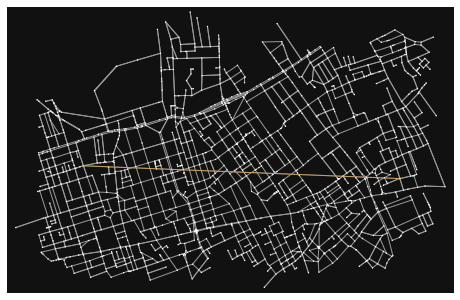

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b5e5990>)

In [90]:
gn.utils.plot.plot_graph_routes(n.graph, [['108209', '338501923']], filename='routes')

In [91]:
n.remove_link('bad_link')

2020-07-28 19:34:43,735 - Removed Link under index: bad_link


### Road Speeds using Google Directions API

You can generate and send google directions API requests based on the network. The process will create a 'car' modal
subgraph and generate API requests for all edges in the subgraph. The number of requests is at most the number of edges
in the subgraph. The process simplifies edges using `osmnx` library's method to extract a chains of nodes with no
intersections, in this way reducing the number of requests. If your graph is already simplified, the number of requests
will be equal to the number of edges.

To send requests to Google Direction API you need a key [(read more here)](https://developers.google.com/maps/documentation/directions/start). After obtaining a key, you can either pass it to the elevant function directly

Or set it as an environmental variable called `GOOGLE_DIR_API_KEY`, if using command line: `$ export GOOGLE_DIR_API_KEY='key'`

If you use AWS, you can also store the key in the `Secrets Manager` [(read more here)](https://aws.amazon.com/secrets-manager/)
authenticate to your AWS account and then pass the `secret_name` and `region_name` to the `send_requests_for_network` 
method:

This method will save derived results in the output directory provided, an example can be found here: 
`../example_data/example_google_speed_data`. It comprises of the google polyline of the response and speed derived from
distance and time taken to travel as well as information that was generated in order to make the response such as
the node ids in the network for which this response holds, the `path_nodes` which denote any extra nodes from the non
simplified chain of nodes/edges in the request, the polyline of the network path, encoded using the same polyline 
encoding as the Google request polyline; as well as spatial information about the origin and destination of the request
and timestamp.

You can read saved results:

In [92]:
api_requests = gn.google_directions.read_saved_api_results('../example_data/example_google_speed_data')

In [93]:
api_requests

{('9791490', '4698712638'): {'path_nodes': ('9791490', '4698712638'),
  'path_polyline': 'mvmyHpqYb@lA',
  'origin': {'id': '9791490',
   'x': 529414.5591563961,
   'y': 181898.4902840198,
   'lat': 51.5211862,
   'lon': -0.1360879,
   's2_id': 5221390682074967291},
  'destination': {'id': '4698712638',
   'x': 529387.9166476472,
   'y': 181877.74867097137,
   'lat': 51.5210059,
   'lon': -0.1364793,
   's2_id': 5221390682013665023},
  'timestamp': 1594385229.635254,
  'parsed_response': {'google_speed': 6.8, 'google_polyline': 'mvmyHpqYb@pA'}}}

Once you have results, you can match them to the network. This will create a dictionary of non-simplified edges to which the response data applies.

In [94]:
google_edge_data = gn.google_directions.map_results_to_edges(api_requests)

In [95]:
google_edge_data

{('9791490', '4698712638'): {'google_speed': 6.8,
  'google_polyline': 'mvmyHpqYb@pA'}}

In [96]:
_n.edge('9791490', '4698712638')

{0: {'permlanes': 1.0,
  'freespeed': 12.5,
  'capacity': 600.0,
  'oneway': '1',
  'modes': ['bike', 'car', 'walk'],
  'from': '9791490',
  'to': '4698712638',
  's2_from': 5221390682074967291,
  's2_to': 5221390682013665023,
  'length': 33.69360946952066,
  'attributes': {'osm:way:access': {'name': 'osm:way:access',
    'class': 'java.lang.String',
    'text': 'no'},
   'osm:way:highway': {'name': 'osm:way:highway',
    'class': 'java.lang.String',
    'text': 'unclassified'},
   'osm:way:osmid': {'name': 'osm:way:osmid',
    'class': 'java.lang.String',
    'text': '476247613'}},
  'id': '621'}}

This data can be applied to the graph in the following way:

In [97]:
def modal_condition(value):
    return 'car' in value
_n.apply_attributes_to_edges(google_edge_data, conditions={'modes': modal_condition}, silent=False)

2020-07-28 19:34:43,815 - Changed Link attributes under index: (9791490, 4698712638, 0)


Resulting in two new data points in the relevant links: `google_speed` and `google_polyline`.

In [98]:
_n.edge('9791490', '4698712638')

{0: {'permlanes': 1.0,
  'freespeed': 12.5,
  'capacity': 600.0,
  'oneway': '1',
  'modes': ['bike', 'car', 'walk'],
  'from': '9791490',
  'to': '4698712638',
  's2_from': 5221390682074967291,
  's2_to': 5221390682013665023,
  'length': 33.69360946952066,
  'attributes': {'osm:way:access': {'name': 'osm:way:access',
    'class': 'java.lang.String',
    'text': 'no'},
   'osm:way:highway': {'name': 'osm:way:highway',
    'class': 'java.lang.String',
    'text': 'unclassified'},
   'osm:way:osmid': {'name': 'osm:way:osmid',
    'class': 'java.lang.String',
    'text': '476247613'}},
  'id': '621',
  'google_speed': 6.8,
  'google_polyline': 'mvmyHpqYb@pA'}}

You can compute differences in speeds using:

In [99]:
def speed_difference(link_attribs):
    return link_attribs['freespeed'] - link_attribs['google_speed']

_n.apply_function_to_links(speed_difference, 'speed_difference')

2020-07-28 19:34:43,841 - 1002 out of 1003 links have not been affected by the function. Links affected: ['621']
2020-07-28 19:34:43,851 - Changed Link attributes under index: 621


Resulting in a new data point in the relevant links: `speed_difference`.

In [100]:
_n.edge('9791490', '4698712638')

{0: {'permlanes': 1.0,
  'freespeed': 12.5,
  'capacity': 600.0,
  'oneway': '1',
  'modes': ['bike', 'car', 'walk'],
  'from': '9791490',
  'to': '4698712638',
  's2_from': 5221390682074967291,
  's2_to': 5221390682013665023,
  'length': 33.69360946952066,
  'attributes': {'osm:way:access': {'name': 'osm:way:access',
    'class': 'java.lang.String',
    'text': 'no'},
   'osm:way:highway': {'name': 'osm:way:highway',
    'class': 'java.lang.String',
    'text': 'unclassified'},
   'osm:way:osmid': {'name': 'osm:way:osmid',
    'class': 'java.lang.String',
    'text': '476247613'}},
  'id': '621',
  'google_speed': 6.8,
  'google_polyline': 'mvmyHpqYb@pA',
  'speed_difference': 5.7}}

You can also choose to set google speed as the `freespeed` in the network. But be mindful if you use it for MATSim
simulations, `freespeed` denotes the maximum speed a vehicle can travel on a certain link, Google Directions API data
with `traffic=True` should be ran late at night/early morning ~4am local time to the network for any reliable results.
Otherwise you are adding traffic conditions to the network which should be simulated by demand (population) side of 
the model rather than supply (network).

In [101]:
_n.edge('9791490', '4698712638')

{0: {'permlanes': 1.0,
  'freespeed': 12.5,
  'capacity': 600.0,
  'oneway': '1',
  'modes': ['bike', 'car', 'walk'],
  'from': '9791490',
  'to': '4698712638',
  's2_from': 5221390682074967291,
  's2_to': 5221390682013665023,
  'length': 33.69360946952066,
  'attributes': {'osm:way:access': {'name': 'osm:way:access',
    'class': 'java.lang.String',
    'text': 'no'},
   'osm:way:highway': {'name': 'osm:way:highway',
    'class': 'java.lang.String',
    'text': 'unclassified'},
   'osm:way:osmid': {'name': 'osm:way:osmid',
    'class': 'java.lang.String',
    'text': '476247613'}},
  'id': '621',
  'google_speed': 6.8,
  'google_polyline': 'mvmyHpqYb@pA',
  'speed_difference': 5.7}}

## Writing results

In [102]:
n.write_to_matsim(os.path.join(path_to_matsim_network, 'genet_output'))

2020-07-28 19:34:43,910 - Writing ../example_data/pt2matsim_network/genet_output/network.xml
2020-07-28 19:34:44,560 - Writing ../example_data/pt2matsim_network/genet_output/schedule.xml
2020-07-28 19:34:44,577 - The stop(s) along your route don't have arrival and departure offsets. This is likely a route with one stop - consider validating your schedule.
2020-07-28 19:34:44,577 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,581 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,584 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses

2020-07-28 19:34:44,666 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,667 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,668 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,670 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:44,732 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,733 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,734 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,735 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:44,798 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,799 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,800 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,801 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:44,849 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,851 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,855 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,856 - The stop(s) along your route don't have arrival and departure offsets. This is likely a route with one stop - consider validating your schedule.
2020-07-28 19:34:44,857 - Route needs to have a network route composed of

2020-07-28 19:34:44,913 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,917 - The stop(s) along your route don't have arrival and departure offsets. This is likely a route with one stop - consider validating your schedule.
2020-07-28 19:34:44,918 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,921 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,923 - Route needs to have a network route composed of

2020-07-28 19:34:44,971 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,977 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,983 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:44,984 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:45,037 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,038 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,039 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,040 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:45,086 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,087 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,088 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,089 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:45,134 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,135 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,136 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,137 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:45,214 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,217 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,223 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,228 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:45,295 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,297 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,298 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,299 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:45,338 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,340 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,341 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,342 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:45,387 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,388 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,391 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,394 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

2020-07-28 19:34:45,439 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,442 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,443 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route taken.
2020-07-28 19:34:45,445 - Route needs to have a network route composed of a list of network links that the vehicle on this route traverses. If read the Schedule from GTFS, the resulting Route objects will not have reference to the network route

In [103]:
_n.write_to_matsim(os.path.join('..', 'example_data', 'osm_genet_output'))

2020-07-28 19:34:48,832 - Writing ../example_data/osm_genet_output/network.xml
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
2020-07-28 19:34:50,524 - Saving nodes and links geojsons to ../example_data/osm_genet_output
2020-07-28 19:34:50,535 - ../example_data/osm_genet_output/nodes.geojson: No such file or directory
2020-07-28 19:34:50,535 - driver GeoJSON does not support creation option ENCODING
2020-07-28 19:34:50,651 - ../example_data/osm_genet_output/links.geojson: No such file or directory
2020-07-28 19:34:50,652 - driver GeoJSON does not support creation option ENCODING
